In [1]:
import uproot
import awkward as ak
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import os, glob
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.firamath])
from matplotlib.colors import LinearSegmentedColormap
# Define the CMS color scheme
cms_colors = [
    (0.00, '#FFFFFF'),  # White
    (0.33, '#005EB8'),  # Blue
    (0.66, '#FFDD00'),  # Yellow
    (1.00, '#FF0000')   # red
]

# Create the CMS colormap
cms_cmap = LinearSegmentedColormap.from_list('CMS', cms_colors)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-mbkfmd01 because the default path (/uscms/home/bbbam/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [12]:
# file = uproot.open("data/GenInfo_only_90.root")
file = uproot.open("../analysis_run3/GenInfo_ATo2Tau/CMSSW_13_0_17/src/Gen/GenInfo_only_A_2Tau_below_m3p6_pt30To300_noOCC_numEvent30.root")
RHTree = file["fevt/RHTree"]

In [10]:
# RHTree.keys()
# RHTree.typenames()
# RHTree.show()

In [13]:
# out_dir='data/plot_H_AA_4Tau_M_10_signal_kinematics'
out_dir='data/plot_A_2Tau_genInfo_traing'
if not os.path.isdir(out_dir):
    os.makedirs(out_dir)
save = False

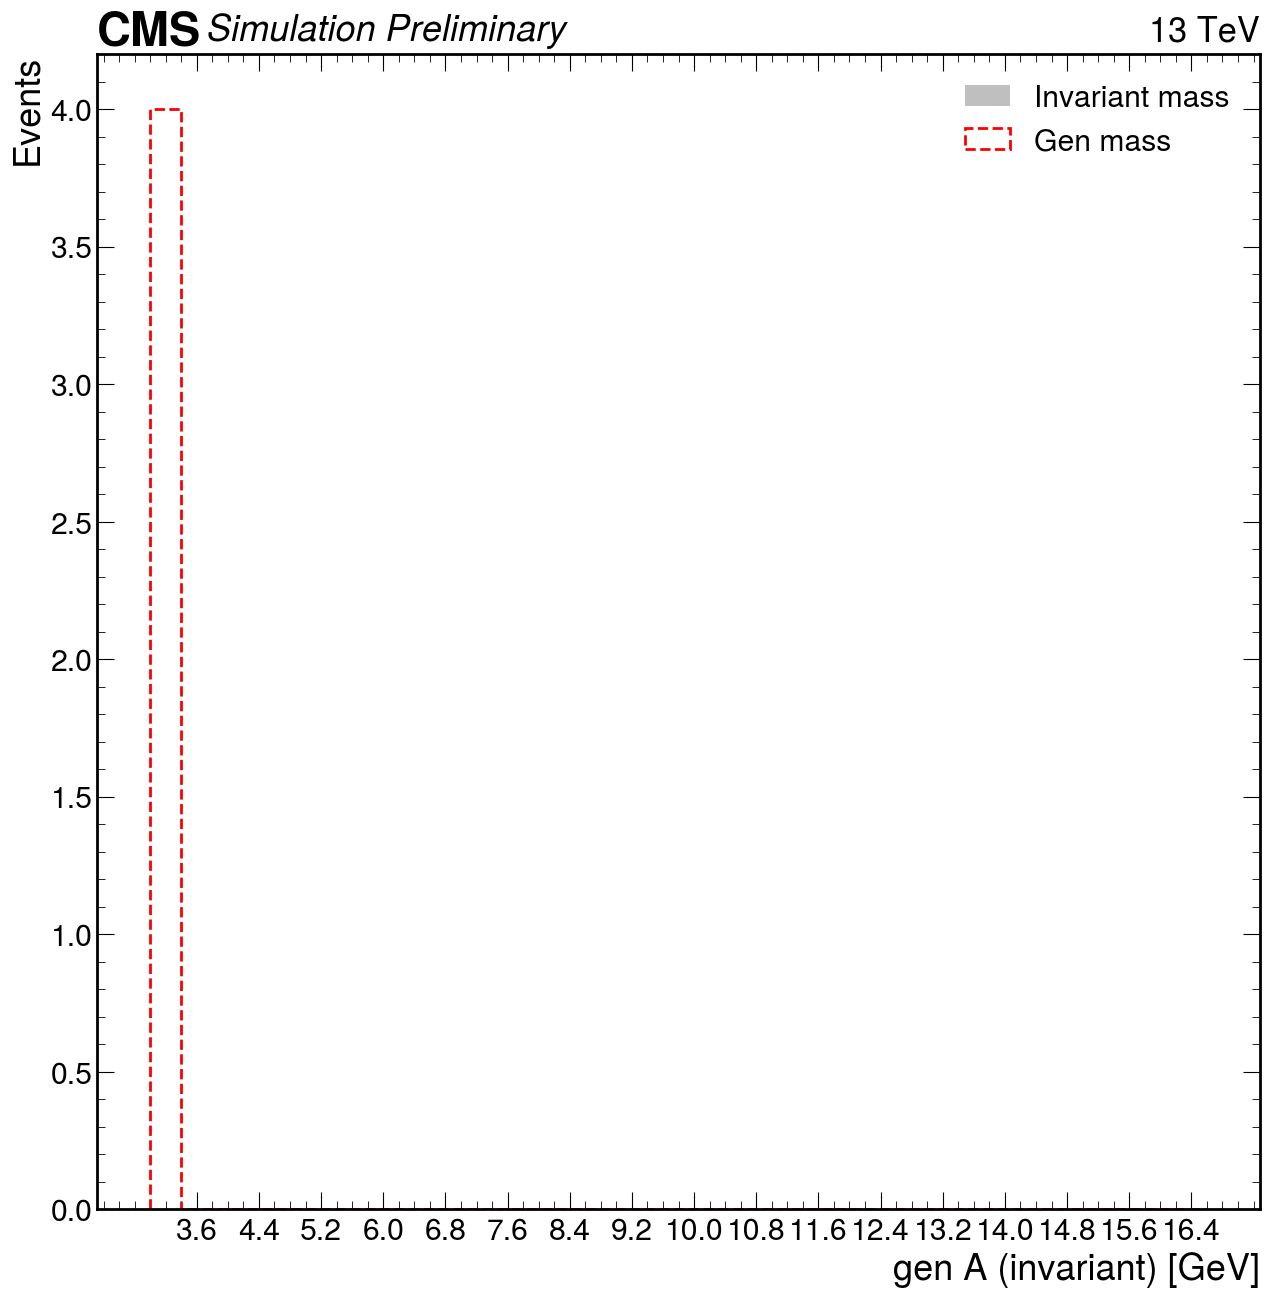

In [14]:
GenA1_invariant = RHTree.arrays(["GenA1_inv"],"GenA1_inv > -111",library="pd")['GenA1_inv']
GenA1 = RHTree.arrays(["GenA1"],"GenA1 > -111",library="pd")['GenA1']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(GenA1_invariant,bins=np.arange(3.,17,0.4),color='grey',alpha=0.5,label="Invariant mass")
plt.hist(GenA1,bins=np.arange(3.,17,0.4),histtype='step',linestyle='--',linewidth=2, color='red',label="Gen mass")
plt.xticks(np.arange(3.6,17,0.8))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A (invariant) [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_mass_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

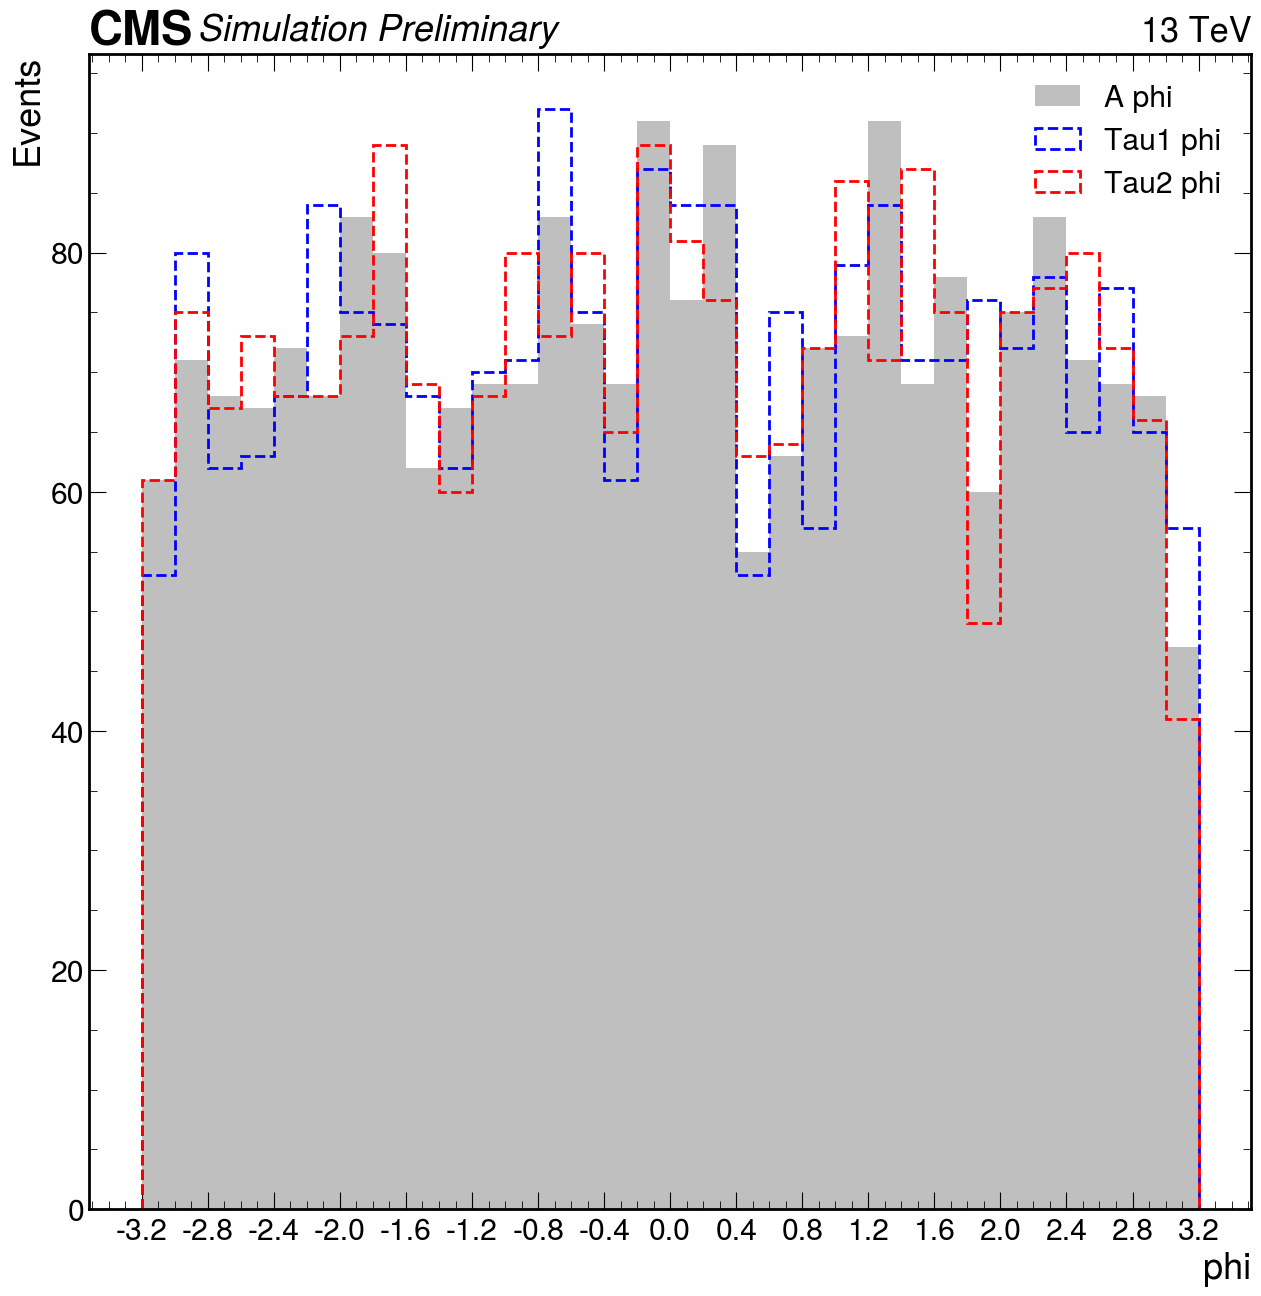

In [37]:
Tau1_phi = RHTree.arrays(["Tau1_phi"],"Tau1_phi > -111",library="pd")['Tau1_phi']
A1_phi = RHTree.arrays(["A1_phi"],"A1_phi > -111",library="pd")['A1_phi']
Tau2_phi = RHTree.arrays(["Tau2_phi"],"Tau2_phi > -111",library="pd")['Tau2_phi']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(A1_phi,bins=np.arange(-3.2,3.4,.2),color='grey',alpha=0.5,label="A phi")
plt.hist(Tau1_phi,bins=np.arange(-3.2,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="Tau1 phi")
plt.hist(Tau2_phi,bins=np.arange(-3.2,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='r',label="Tau2 phi")
plt.xticks(np.arange(-3.2,3.4,.4))
plt.legend()
plt.ylabel("Events")
plt.xlabel("phi")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_Tau_phi_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

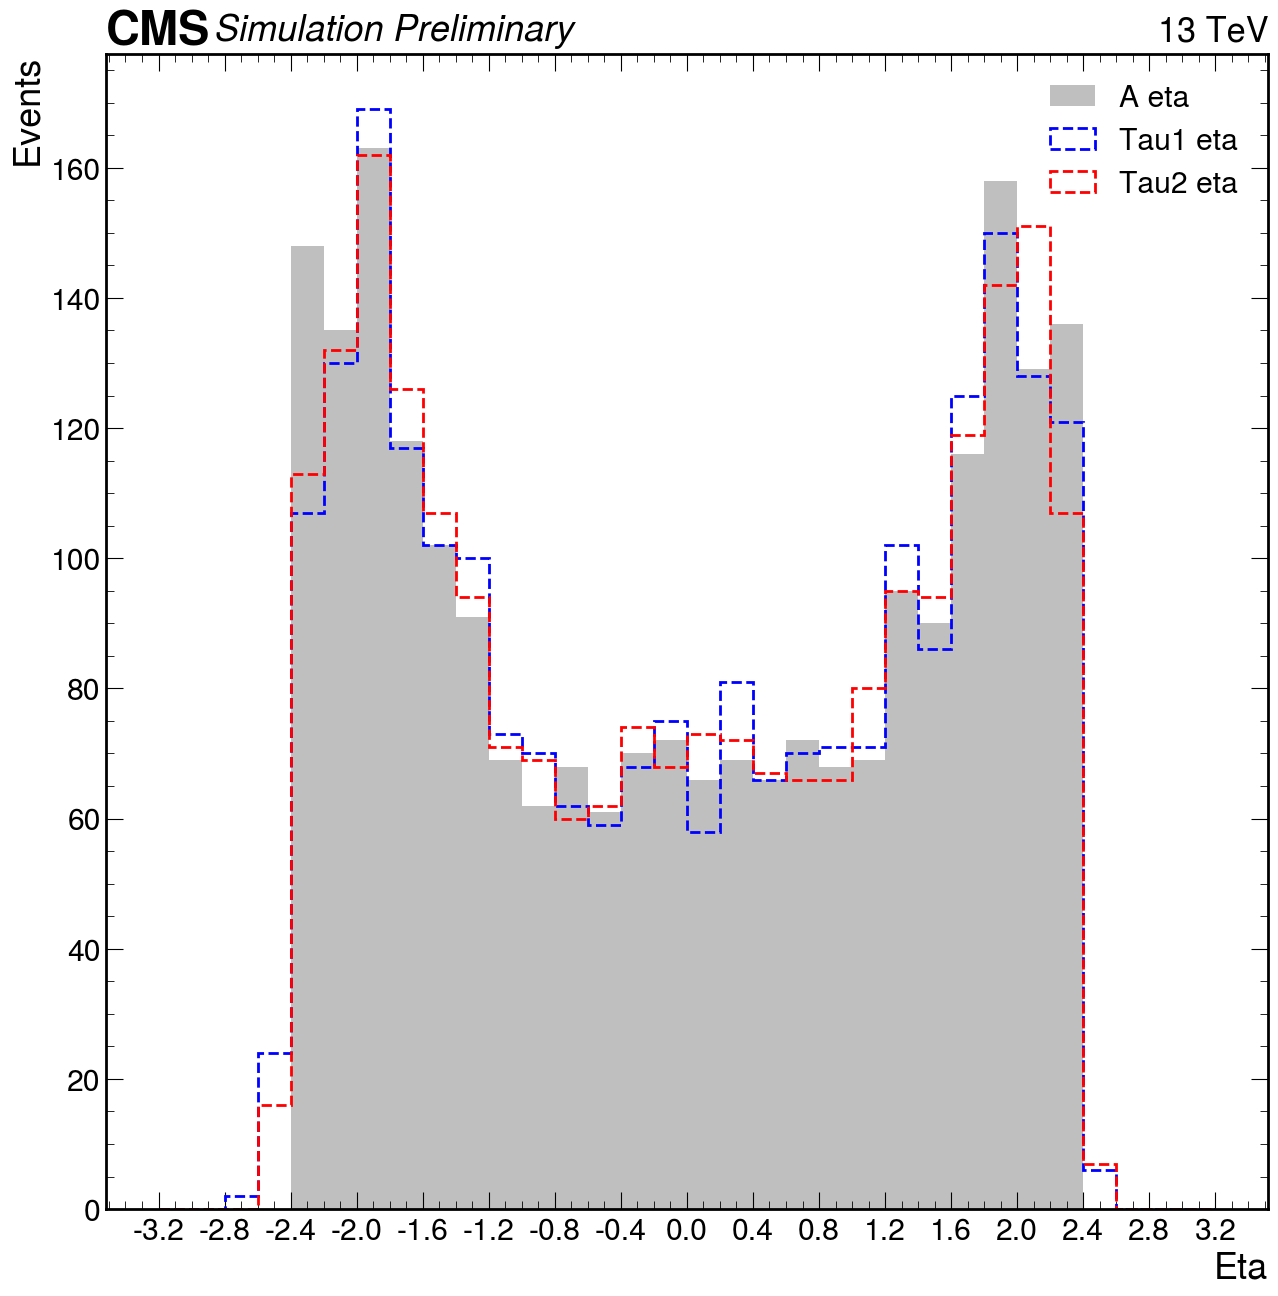

In [38]:
Tau1_eta = RHTree.arrays(["Tau1_eta"],"Tau1_eta > -111",library="pd")['Tau1_eta']
A1_eta = RHTree.arrays(["A1_eta"],"A1_eta > -111",library="pd")['A1_eta']
Tau2_eta = RHTree.arrays(["Tau2_eta"],"Tau2_eta > -111",library="pd")['Tau2_eta']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(A1_eta,bins=np.arange(-3.2,3.4,.2),color='grey',alpha=0.5,label="A eta")
plt.hist(Tau1_eta,bins=np.arange(-3.2,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='b',label="Tau1 eta")
plt.hist(Tau2_eta,bins=np.arange(-3.2,3.4,.2),histtype='step',linestyle='--',linewidth=2,color='r',label="Tau2 eta")
plt.xticks(np.arange(-3.2,3.4,.4))
plt.legend()
plt.ylabel("Events")
plt.xlabel("Eta")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_Tau_eta_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

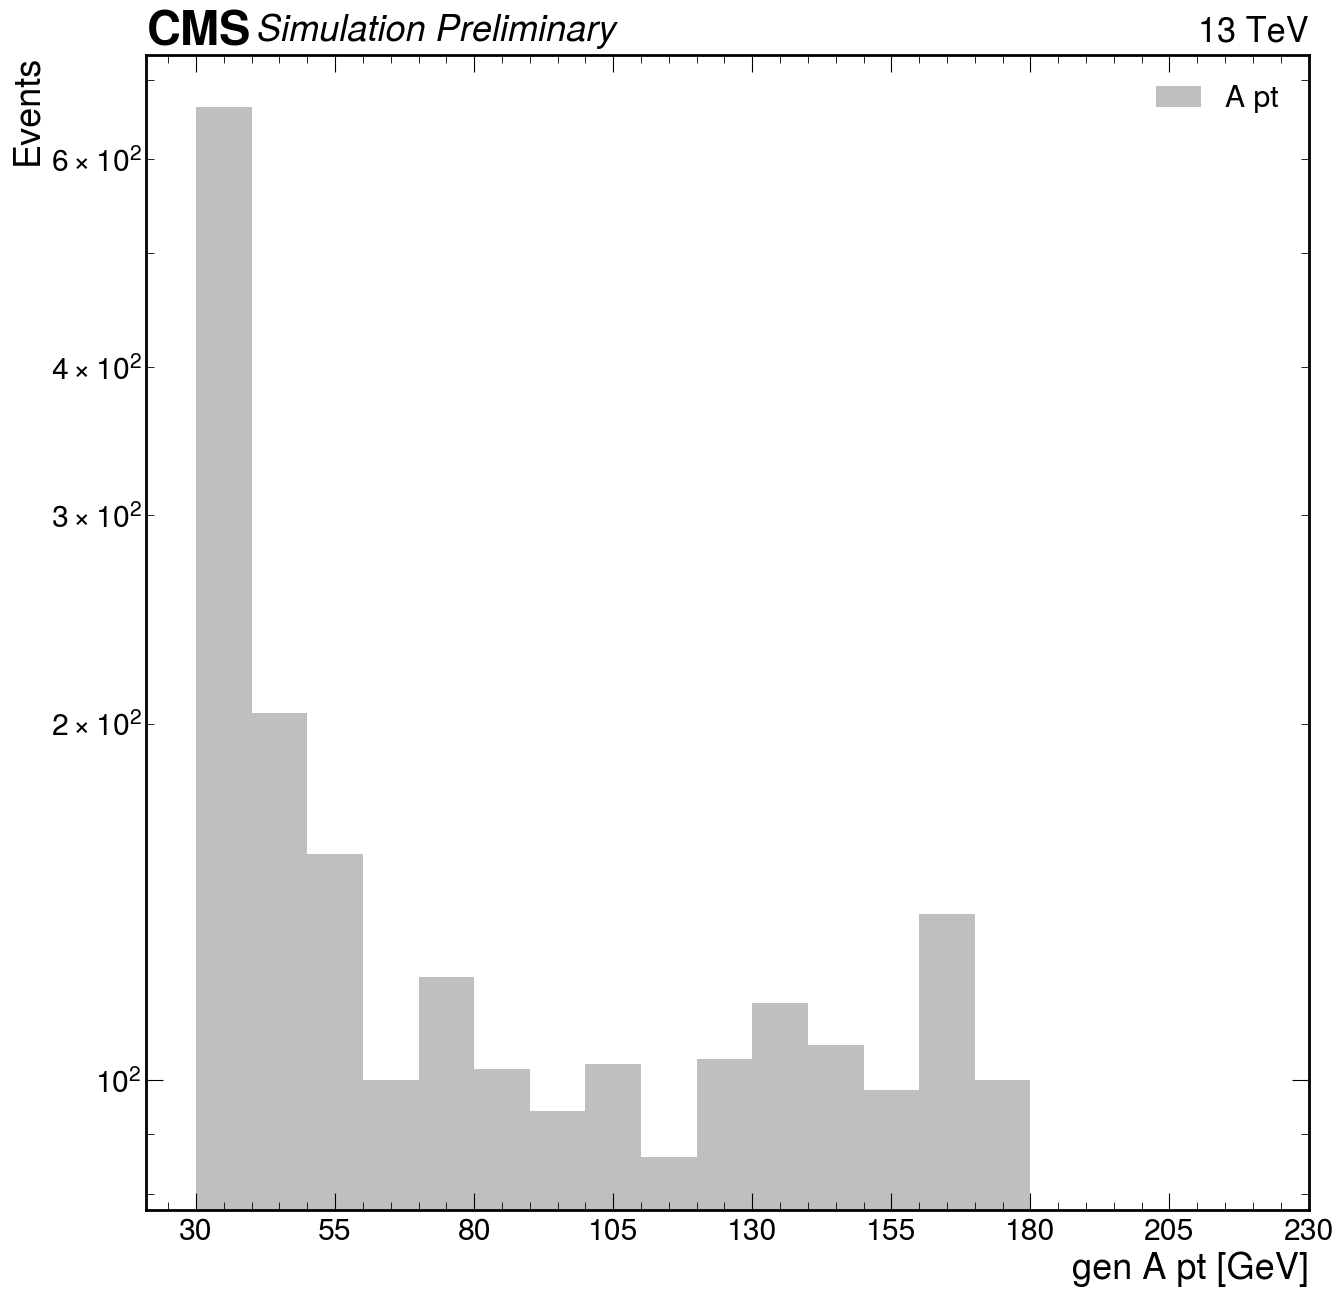

In [39]:
A1_pt = RHTree.arrays(["A1_pt"],"A1_pt > -111",library="pd")['A1_pt']
fig, ax = plt.subplots(figsize=(15,15))
plt.hist(A1_pt,bins=np.arange(30,220,10),color='grey',alpha=0.5,label="A pt",log=True)
plt.xticks(np.arange(30,250,25))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen A pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_A_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

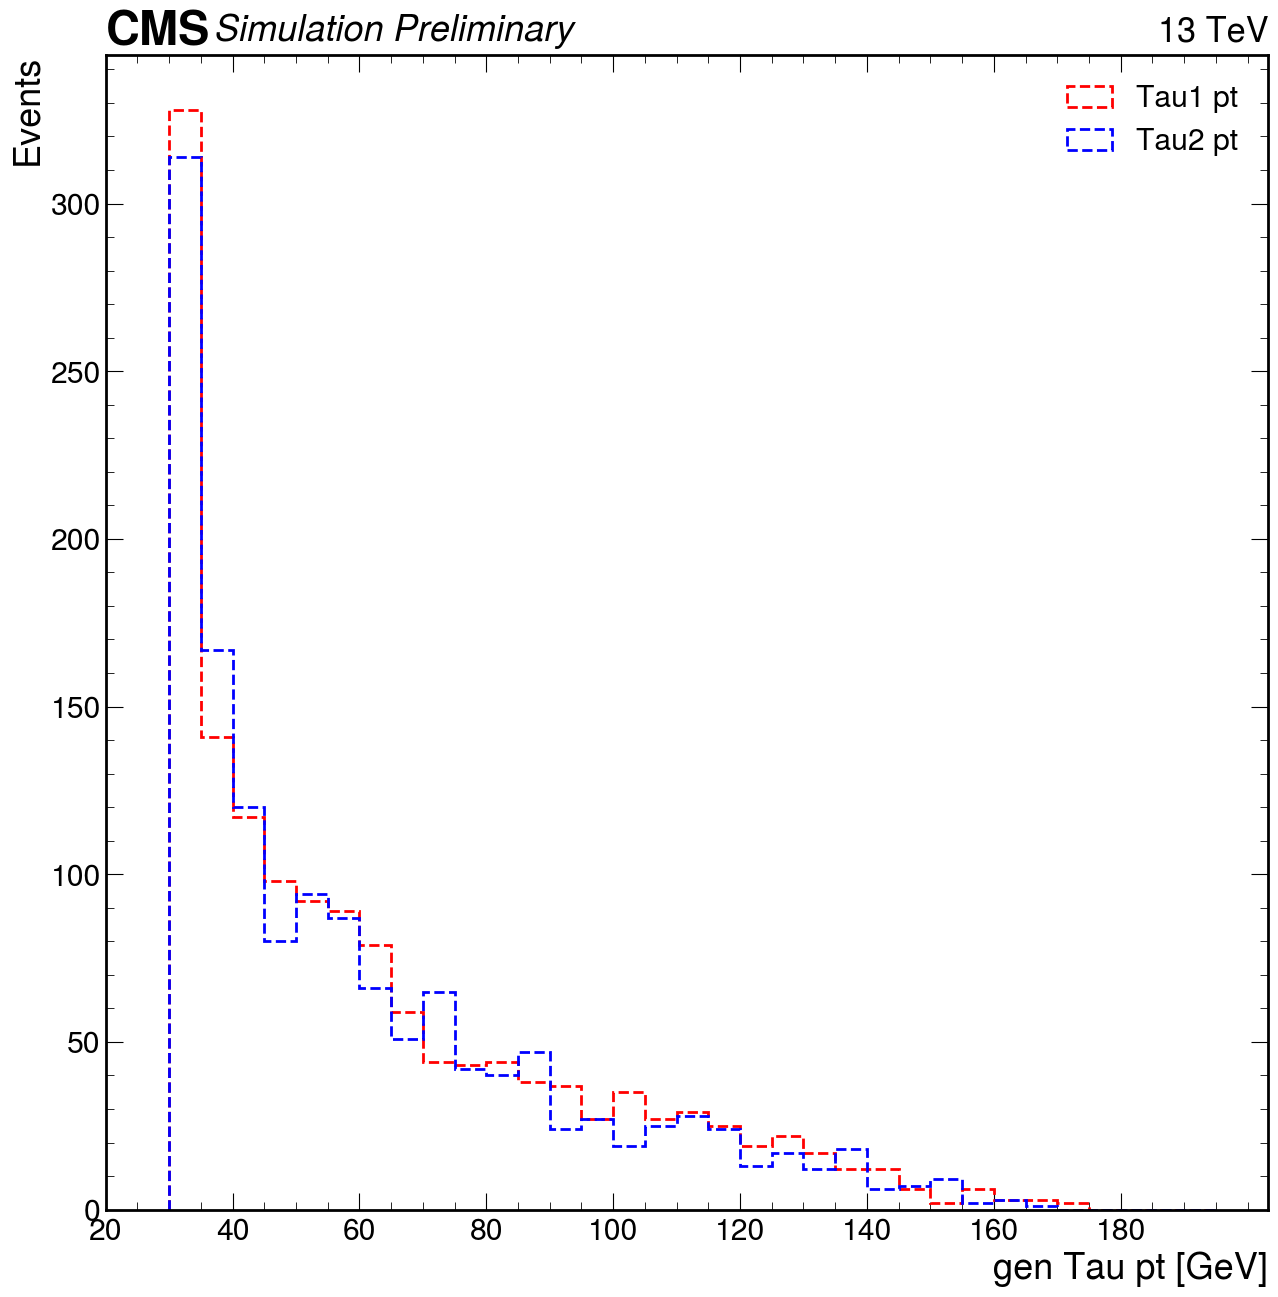

In [40]:
Tau1_pt = RHTree.arrays(["Tau1_pt"],"Tau1_pt > -111",library="pd")['Tau1_pt']
Tau2_pt = RHTree.arrays(["Tau2_pt"],"Tau2_pt > -111",library="pd")['Tau2_pt']

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(Tau1_pt,bins=np.arange(30,200,5),histtype='step',linestyle='--',linewidth=2, color='red',label="Tau1 pt")
plt.hist(Tau2_pt,bins=np.arange(30,200,5),histtype='step',linestyle='--',linewidth=2, color='b',label="Tau2 pt")

plt.xticks(np.arange(20,200,20))
plt.legend()
plt.ylabel("Events")
plt.xlabel("gen Tau pt [GeV]")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_Tau_pt_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

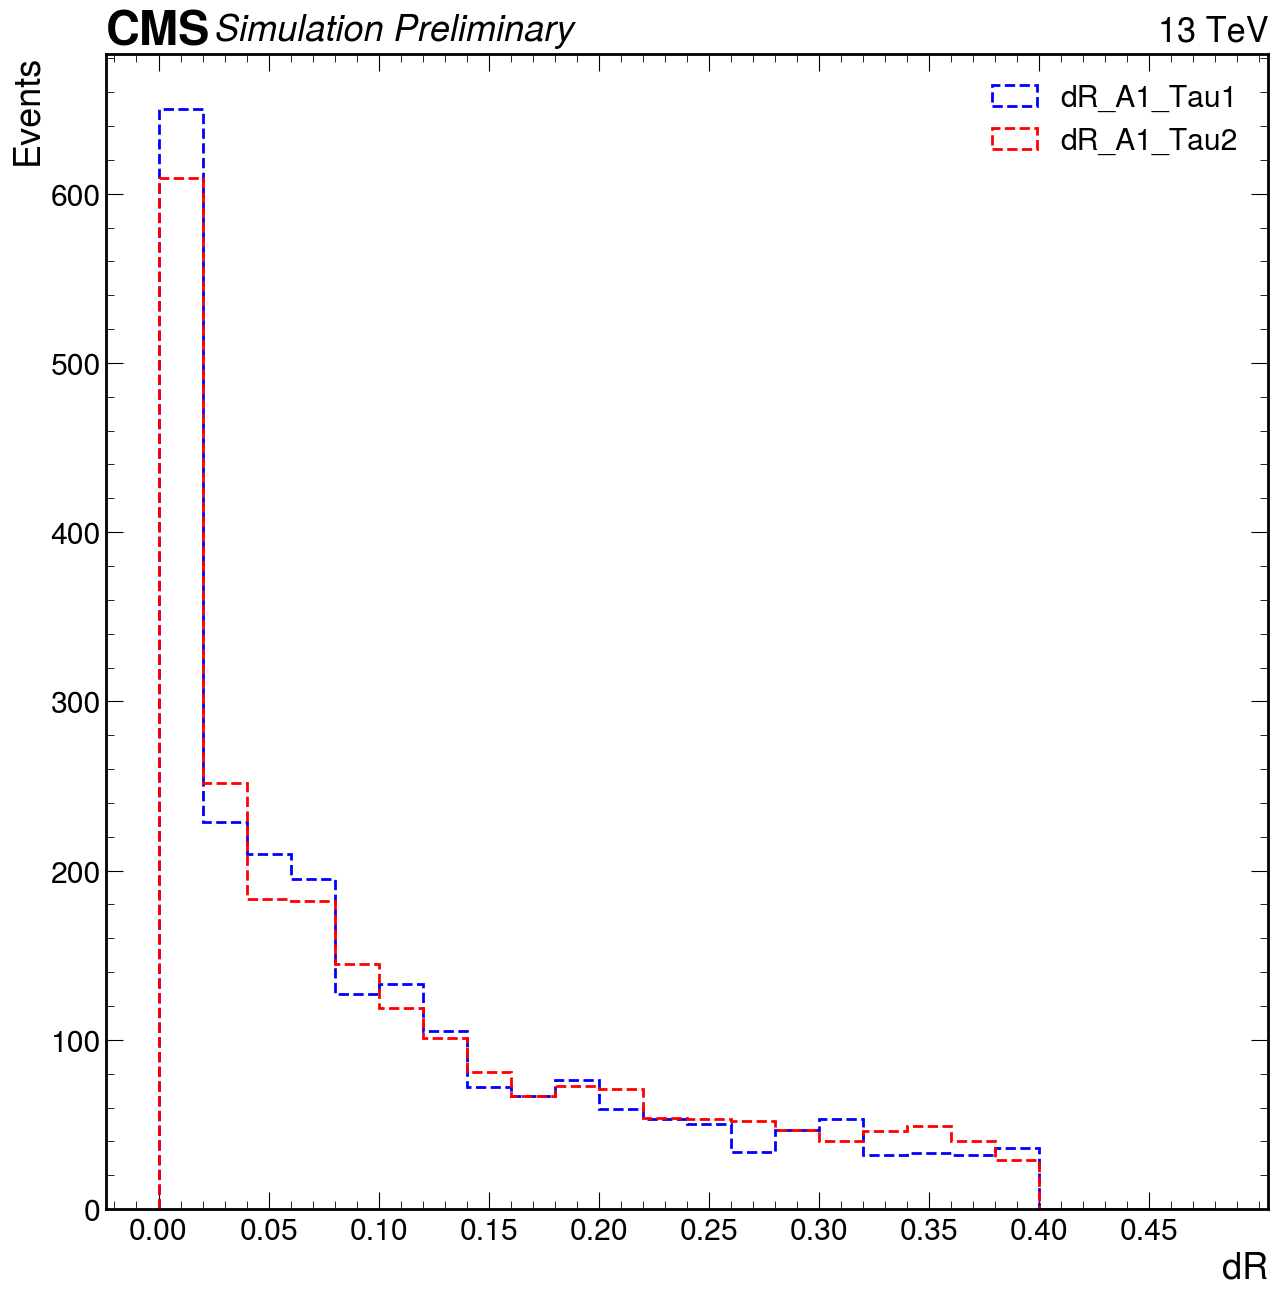

In [41]:
dR_A1_Tau1 = RHTree.arrays(["dR_A1_Tau1"],"dR_A1_Tau1 > -111",library="pd")['dR_A1_Tau1']
dR_A1_Tau2 = RHTree.arrays(["dR_A1_Tau2"],"dR_A1_Tau2 > -111",library="pd")['dR_A1_Tau2']

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_A1_Tau1,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_A1_Tau1")
plt.hist(dR_A1_Tau2,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='r',label="dR_A1_Tau2")

plt.xticks(np.arange(0,.5,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_A_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

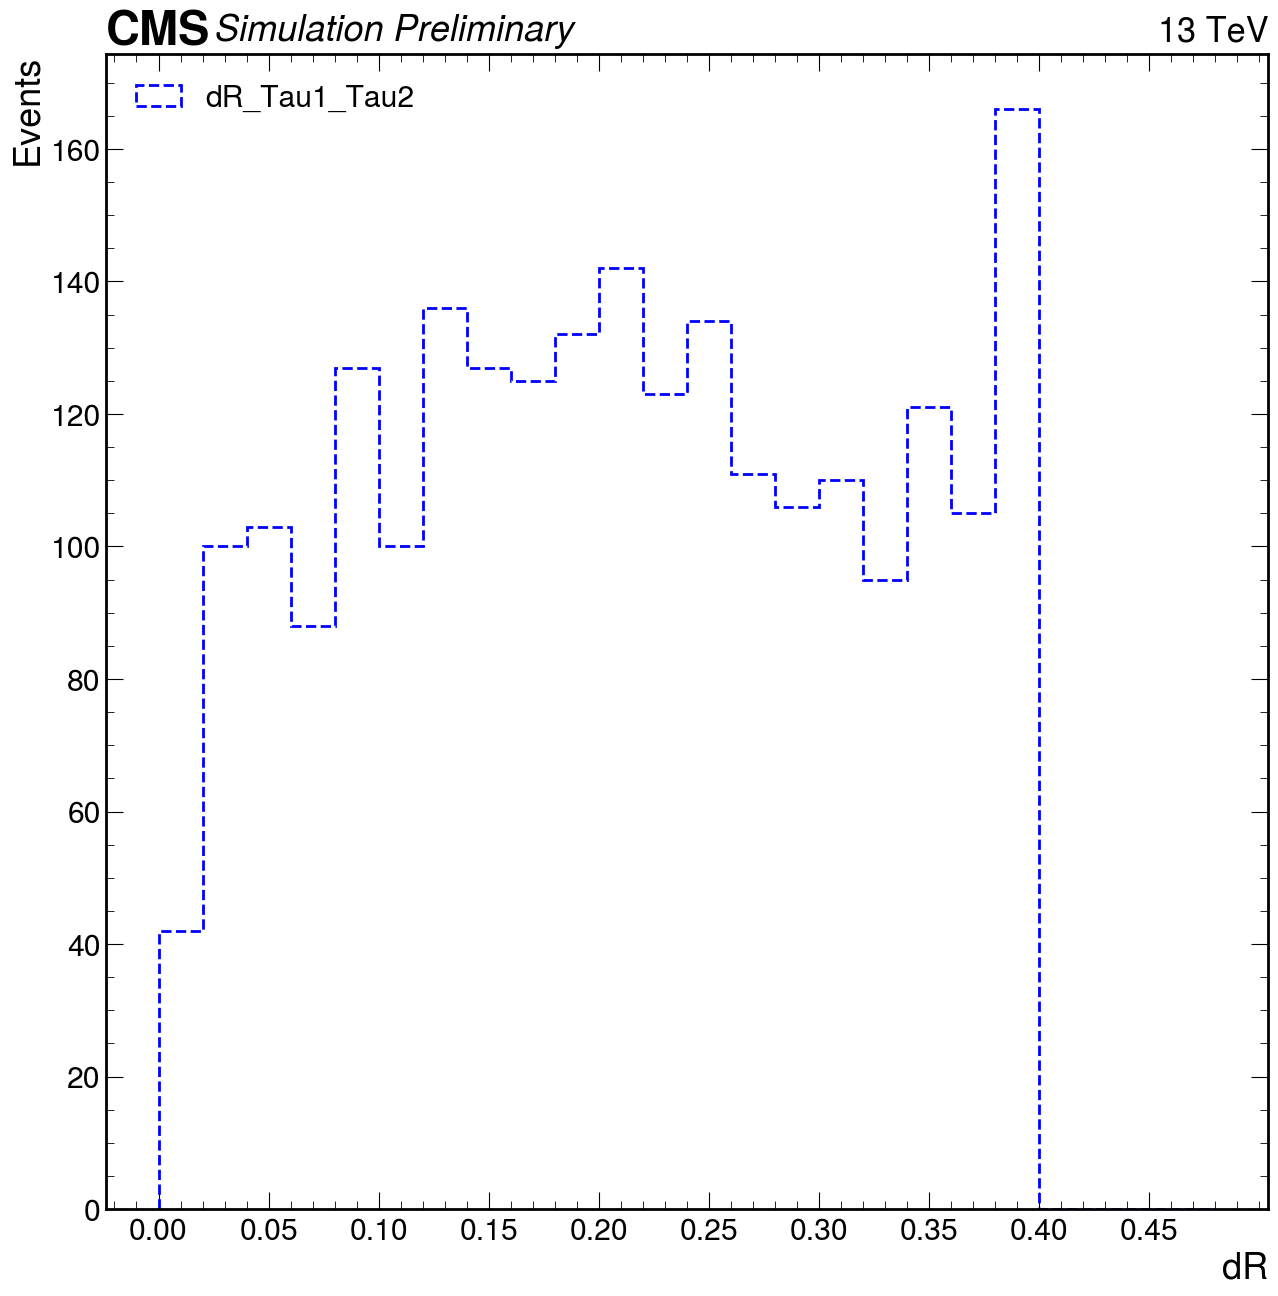

In [42]:
dR_Tau1_Tau2 = RHTree.arrays(["dR_Tau1_Tau2"],"dR_Tau1_Tau2 > -111",library="pd")['dR_Tau1_Tau2']

fig, ax = plt.subplots(figsize=(15,15))
plt.hist(dR_Tau1_Tau2,bins=np.arange(0,.5,.02),histtype='step',linestyle='--',linewidth=2, color='b',label="dR_Tau1_Tau2")

plt.xticks(np.arange(0,.5,.05))
plt.legend()
plt.ylabel("Events")
plt.xlabel("dR")
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/gen_dR_Tau_Tau_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()

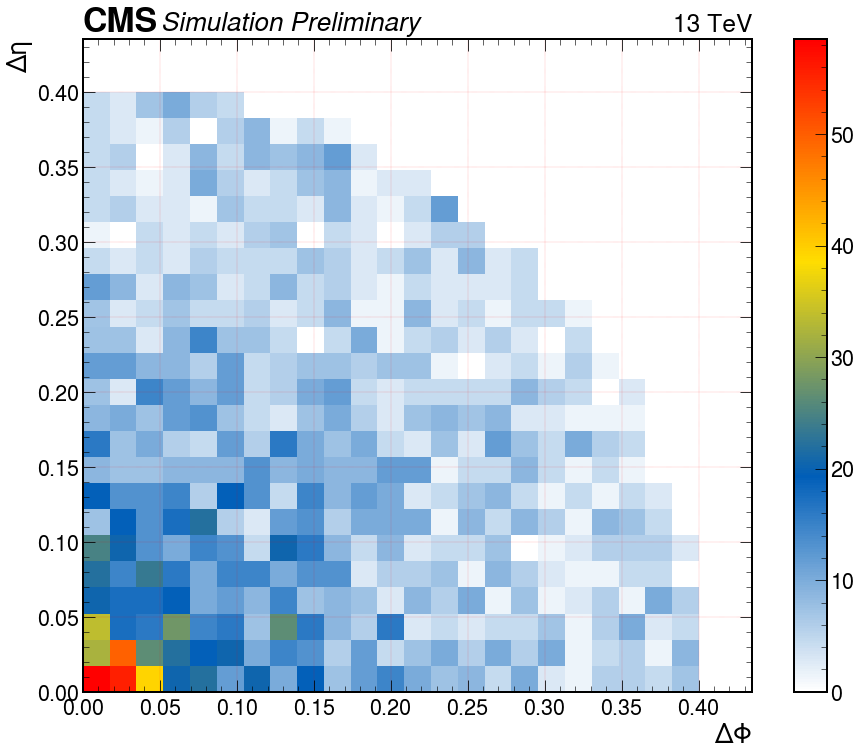

In [5]:
Tau1_Tau2_dphi = RHTree.arrays(["Tau1_Tau2_dphi"],"Tau1_Tau2_dphi > -111",library="pd")['Tau1_Tau2_dphi']
Tau1_Tau2_deta = RHTree.arrays(["Tau1_Tau2_deta"],"Tau1_Tau2_deta > -111",library="pd")['Tau1_Tau2_deta']
fig, ax = plt.subplots(figsize=(15,12))
plt.hist2d( Tau1_Tau2_dphi, Tau1_Tau2_deta,bins=[np.arange(0,.44,0.0174),np.arange(0,.44,0.0174)],cmap=cms_cmap, density=True)
plt.colorbar()
# plt.xticks(np.arange(0,.44,0.0174),size=5)
# plt.yticks(np.arange(0,.44,0.0174),size=12)
plt.ylabel("\u0394\u03B7")
plt.xlabel("\u0394\u03A6")
plt.grid(color='r', linestyle='--', linewidth=.2)
hep.cms.label(llabel="Simulation Preliminary", rlabel="13 TeV", loc=0, ax=ax)
if save: plt.savefig('%s/Tau1_Tau2_dphi_deta_2D_hist.png'%(out_dir),  bbox_inches='tight', dpi=300, facecolor = "w")
plt.show()